In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load(div: int):
    d = defaultdict(lambda: defaultdict(int))
    for line in open('data.txt'):
        try:
            i, j, b, w, c = map(int, line.split())
        except ValueError:
            continue
        key = (i, j)
        d[key][(b - w) // div] += c
    return {key: dict(value) for key, value in d.items()}

In [3]:
data_1 = load(1)

985703


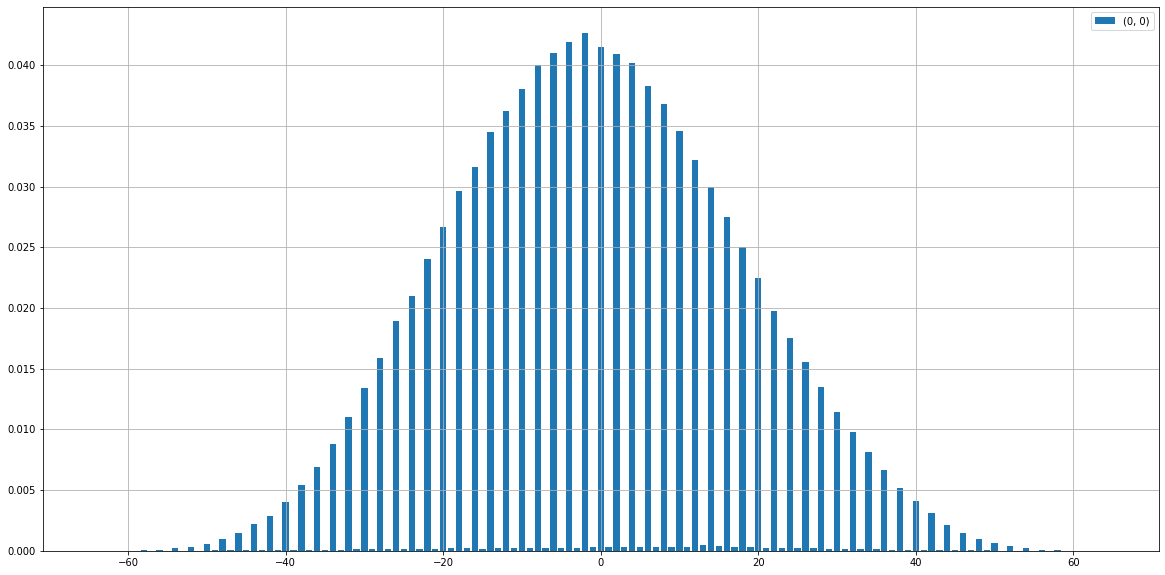

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xbound(-64, 64)

x, y = np.array(sorted(data_1[(0, 0)].items())).T
print(np.sum(y))
y = y / np.sum(y)
ax.bar(x, y, label=f'{(0, 0)}')
ax.legend()
ax.grid()
fig.savefig('00.png')

In [5]:
np.sum(x * y), np.sqrt(np.sum(x * x * y) - np.sum(x * y) ** 2)

(-0.8628410383249313, 18.200954129244945)

In [6]:
div = 4
data = load(div)

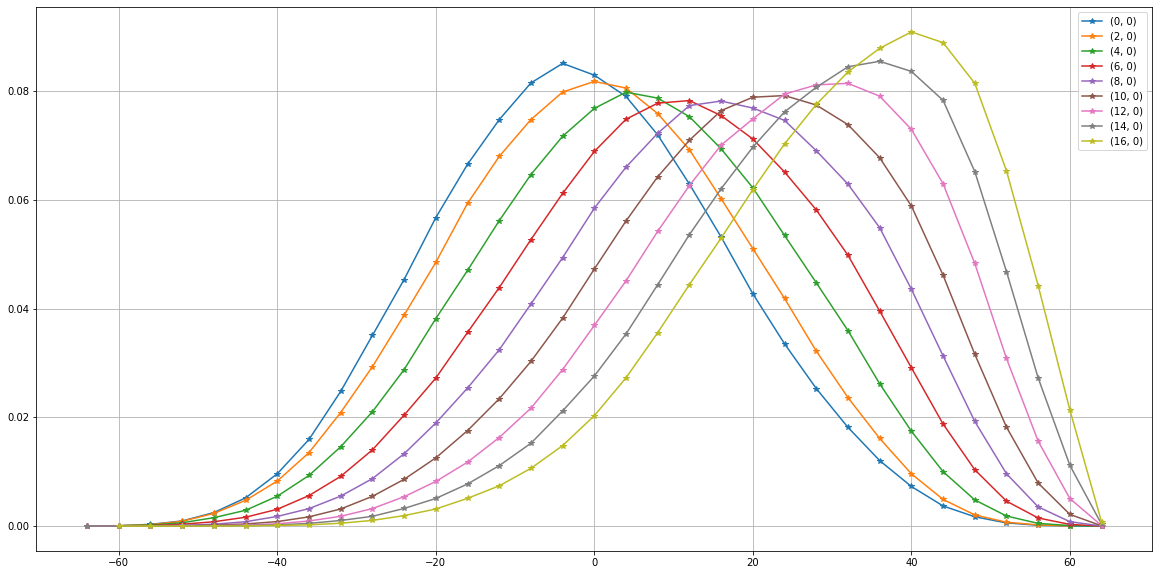

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xbound(-64, 64)

for i in range(0, 17, 2):
    key = (i, 0)
    x, y = np.array(sorted(data[key].items())).T
    y = y / np.sum(y)
    ax.plot(x * div, y, label=f'{key}', marker='*')
ax.legend()
ax.grid()
fig.savefig('b0-16.png')

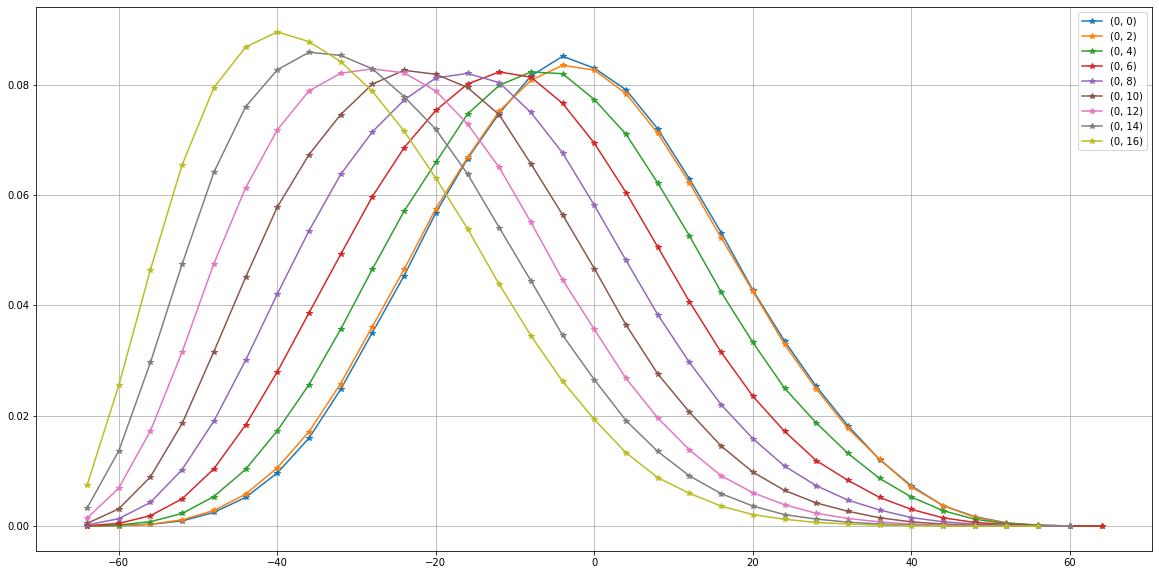

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xbound(-64, 64)

for i in range(0, 17, 2):
    key = (0, i)
    x, y = np.array(sorted(data[key].items())).T
    y = y / np.sum(y)
    ax.plot(x * div, y, label=f'{key}', marker='*')
ax.legend()
ax.grid()
fig.savefig('w0-16.png')

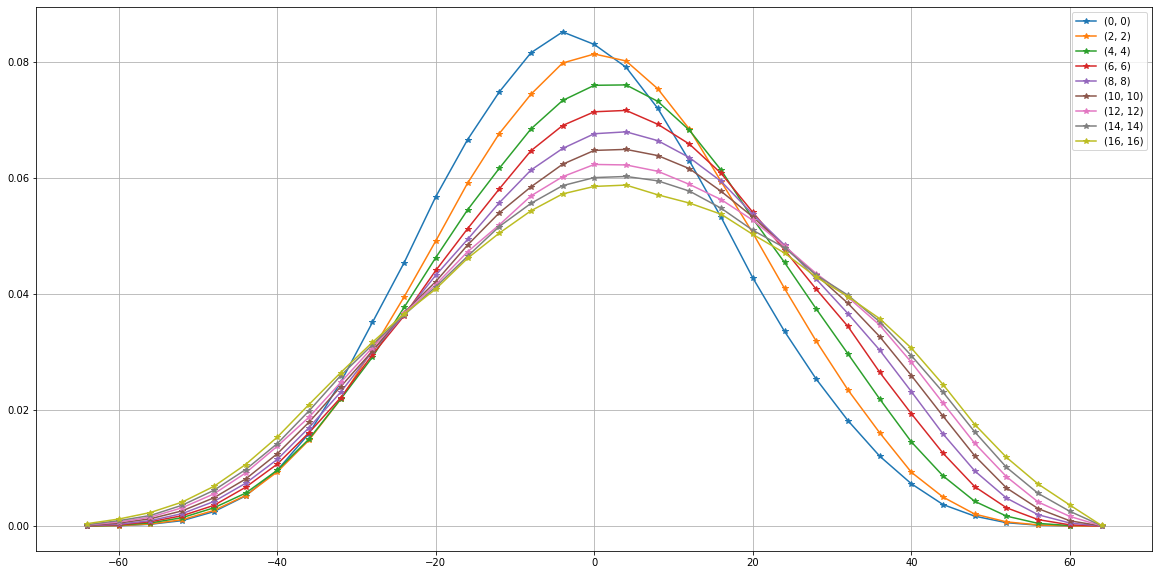

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xbound(-64, 64)

for i in range(0, 17, 2):
    key = (i, i)
    x, y = np.array(sorted(data[key].items())).T
    x *= div
    y = y / np.sum(y)
    ax.plot(x, y, label=f'{key}', marker='*')
ax.legend()
ax.grid()
fig.savefig('bw_even.png')

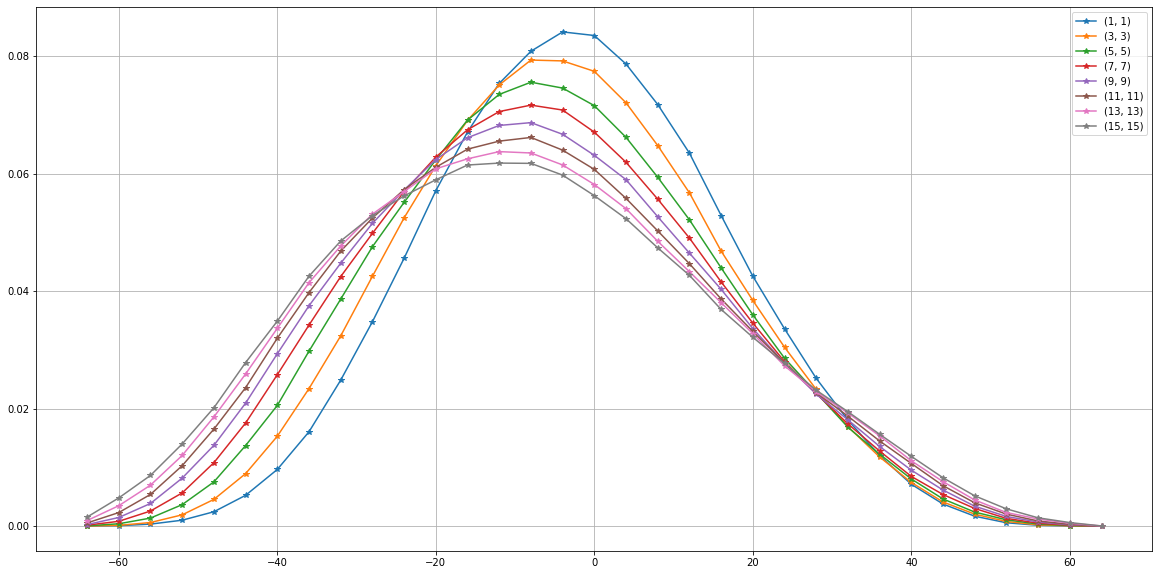

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xbound(-64, 64)

for i in range(1, 17, 2):
    key = (i, i)
    x, y = np.array(sorted(data[key].items())).T
    x *= div
    y = y / np.sum(y)
    ax.plot(x, y, label=f'{key}', marker='*')
ax.legend()
ax.grid()
fig.savefig('bw_odd.png')

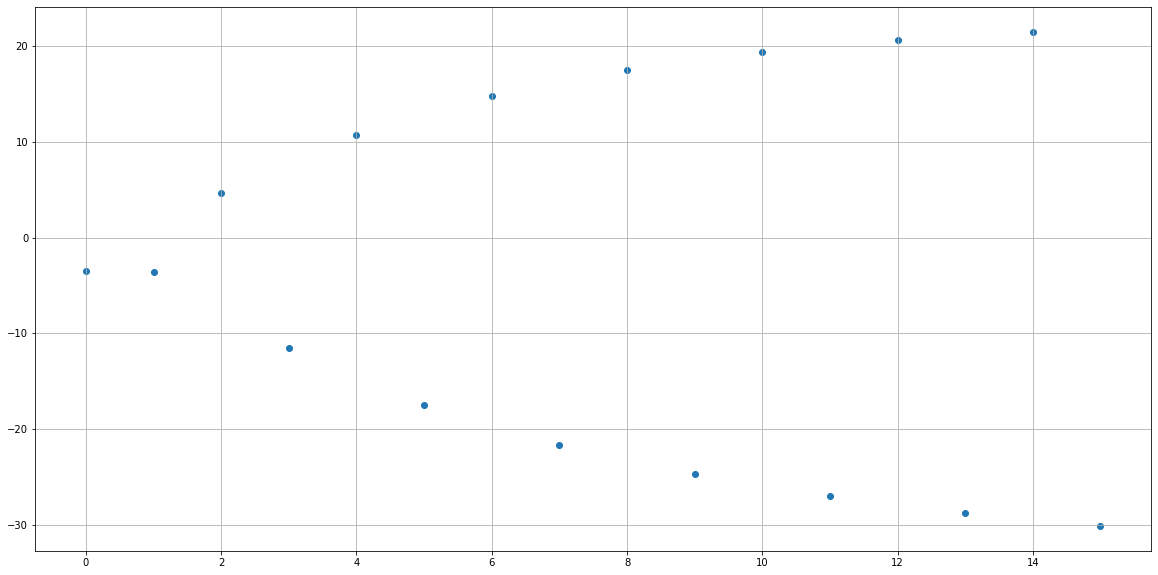

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

xx = []
yy = []
for i in range(0, 16):
    key = (i, i)
    x, y = np.array(sorted(data_1[key].items())).T
    x *= div
    y = y / np.sum(y)
    xx.append(i)
    yy.append(np.sum(x * y))
ax.scatter(xx, yy)
ax.grid()
fig.savefig('s.png')